<center>

<h1>$\textbf{Restricted Boltzmann Machines}$</h1>

$\textit{Author : Antonios Kastellakis}$<br>


<h2>$\textbf{Introduction}$</h2>

Restricted Boltzmann Machines (RBMs) are a special type of neural networks that was widely used as  building blocks in deep learning architectures and they continue to play an important role in applied and theoretical machine learning. In this work we will train a RBM to perform generative modeling.

Generative modeling is a very useful application of neural networks that falls under the category of unsupervised learning. The model automatically discovers and learns the correlations of the input data, so as to be able to generate new instances that could have been possibly drawn from the original data set. Simply put, the model captures the distribution of the data.

<h2>$\textbf{Historical background}$</h2>

In 1982 Hopfield introduced a fully connected network of interacting units that have the ability to store and retrieve binary patterns [1]. Hopfield networks can be considered as a dynamical system in which the stable states of the system correspond to the patterns we want to store. They belong to the category of energy based models where the desired patterns are associated with the minima of a suitably defined energy. In the figure below we can see a Hopfield network with 5 neurons.

![Hopfield Network](https://upload.wikimedia.org/wikipedia/commons/thumb/7/76/Hopfield-network.svg/247px-Hopfield-network.svg.png)

The network is initialized randomly and each unit updates its state through a simple rule that depends on the units it is connected to. Mimicking nature, the evolution of a Hopfield network constantly decreases its energy. An interesting question to be raised at this point is where did the inspiration for this "energy" concept came from?

Hopfield mentioned a spin glass system based on the Ising model [2]. In physics, a spin glass is a magnetic state characterized by randomness. In contrast with a ferromagnet where all the spins align, the spins in a spin glass are aligned randomly without a regular pattern. This is depicted in the figure below.

![Spin Glass](https://upload.wikimedia.org/wikipedia/commons/thumb/6/62/Spin_glass_by_Zureks.svg/182px-Spin_glass_by_Zureks.svg.png)

When a external field is applied each magnetic spin tries to align itself to the local field and in doing so it may flip. However this causes a chain reaction because it will change the fields at other dipoles. A change at the magnetic fields of other dipoles may cause them to flip which in turn changes the field at the current dipole. This process is what we call the evolution of the system and it continues until the system reaches a minimum energy state. The dipoles stop flipping if any flips results in increase of energy.

The Hopfield network was very influential in the development of neural network models in the 80's. Though successful in storing/retrieving the desired patterns, it was observed that the Hopfield model has various problems such as limited storing capacity and spurious minima.  In an attempt to mitigate these issues, a stochastic version of the Hopfield model, called Boltzmann machine, was proposed [3]. In contrast to Hopfield networks, where the units are deterministic, Boltzmann machine units are stochastic. Each unit updates its state over time in a probabilistic way depending on the states of the neighboring units. The units of a Boltzmann machine are divided into 'visible' units, V, and 'hidden' units, H. The visible units are the ones that interact with the environment and work as information input to the machine, while the hidden units are latent variables forming a conditional hidden representation of the data.

![Boltzmann Machine](https://upload.wikimedia.org/wikipedia/commons/7/7a/Boltzmannexamplev1.png)

However, learning the parameters of the Boltzmann Machine model is computationally intensive. To reduce the complexity of learning, a restricted communication structure was introduced [4]. This model is called the Restricted Boltzmann machine.

<h2>$\textbf{RBMs}$</h2>

A restricted Boltzmann machine is a probabilistic energy based model that  shares a mathematical foundation with models that describe the interactions of particles, such as the Ising model. Similar to the standard Boltzmann machine, the architecture is organised into two layers, commonly referred to as the ”visible” and ”hidden” units respectively. However, unlike Boltzmann machines, lateral connections within a layer are prohibited to make the computations faster, resulting in edges defined as $e = \{ \{v,h\}: v \in V, h \in H \}$. This is illustrated in the figure below.

![Restricted Boltzmann machine](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e8/Restricted_Boltzmann_machine.svg/225px-Restricted_Boltzmann_machine.svg.png)

The units of a restricted Boltzmann machine are stochastic binary units that can be either 0 or 1. The joint state of each layer is represented by vectors $\mathbf{v} \in \{0,1\}^V$ and $\mathbf{h} \in \{0,1\}^H$. Generally, there are other types of units that can be used, such as Gaussian units, but the most widely used are the stochastic binary units that we see here.

Each unit within the RBM has an associated bias and each connection carries an associated weight. As a generative model,the RBM represents a probability distribution, and it computes the probability of observing a specific pair of a visible vector $(\mathbf{v})$ an a hidden vector $(\mathbf{h})$ as follows:

\begin{equation}
        p(\mathbf{v},\mathbf{h}) = \frac{1}{Z} \; e^{-E(\mathbf{v},\mathbf{h})}.
\end{equation}

To determine the probability of a given visible sample vector $(\mathbf{v})$, we sum over all possible hidden vectors:

\begin{equation}
    p(\mathbf{v}) = \frac{1}{Z} \sum_{\mathbf{h}} \; e^{-E(\mathbf{v},\mathbf{h})}.
\end{equation}

The energy associated with each joint configuration of all units  $(\mathbf{v},\mathbf{h})$ depends on the pairwise interactions of the units and their biases, and it is expressed as:

\begin{align}
    E(\mathbf{v},\mathbf{h}) & = - \sum_{i \in visible} a_i v_i \; - \sum_{j \in hidden} b_j h_j \; - \sum_{i,j} w_{ij} v_i h_j \\
    & = -\mathbf{a}^T \mathbf{v} - \mathbf{b}^T \mathbf{h} - \mathbf{v}^T W \mathbf{h}
\end{align}

Here, $v_i$ and $h_j$ represent the binary states of the visible unit $i$ and hidden unit $j$, respectively. Additionally, $a_i$ and $b_j$ denote their respective biases, and $w_{ij}$ signifies the weight between these units.

The 'partition function', $Z$, is calculated by summing over all possible pairs of visible and hidden vectors

\begin{equation}
        Z = \sum_{\mathbf{v},\mathbf{h}} e^{-E(\mathbf{v},\mathbf{h})}.
\end{equation}

The partition function can be interpreted as a normalizing constant to ensure that the probabilities sum to 1. Nevertheless, lurking within this concept is a predicament. Upon closer examination, it becomes evident that computing the partition function is a computationally intensive task, especially as it involves integrating over all possible states—a feasible endeavor only for diminutive toy problems. The partition function, denoted as $Z$, exhibits exponential growth in relation to both the hidden and visible units of the model. As per complexity theory, any problem with an exponential nature should be classified as intractable when run on conventional computers.This predicament poses a significant challenge, rendering the joint probability distribution $p(\mathbf{v},\mathbf{h})$ intractable.

The solution to this problem lies within the field of statistics with an algorithm called Gibbs sampling, which is employed when direct sampling is difficult. In statistics, Gibbs sampling is a Markov chain Monte Carlo algorithm that constructs a Markov chain whose values converge towards a target distribution. In essence, rather than calculating the joint configuration $(\mathbf{v},\mathbf{h})$, Gibbs sampling involves alternating transitions between states of $\textbf{v}$ and $\textbf{h}$ while sampling from $p(\mathbf{h}|\mathbf{v})$ and $p(\mathbf{v}|\mathbf{h})$, both of which are computationally manageable. This means that we can simultaneously and independently sample from all the elements of $\mathbf{h}$ given $\mathbf{v}$ and vice versa for $\mathbf{v}$ given $\mathbf{h}$. To get an unbiased estimate, we need the Markov chain to converge to a stationary distribution.

![Markov Chain](https://miro.medium.com/v2/resize:fit:1400/1*UMbNSJVSmAgqkVnQKA62yg.png)

Using Bayes theorem we can derive the probability of the hidden units conditioned on all visible units:

\begin{align}
    p(\mathbf{h}|\mathbf{v}) &
    = \frac{p(\mathbf{h},\mathbf{v})}{p(\mathbf{v})}
    = \frac{p(\mathbf{v},\mathbf{h})}{\sum_{\mathbf{h}} p(\mathbf{v},\mathbf{h}) } = \frac{e^{-E(\mathbf{v},\mathbf{h})}}{\sum_{\mathbf{h}} e^{-E(\mathbf{v},\mathbf{h})} } \\[0.25 cm] &
    = \frac{e^{\mathbf{a}^T \mathbf{v}}\cdot
    e^{\mathbf{b}^T \mathbf{h} +  \mathbf{v}^T W \mathbf{h}}}{\sum_{\mathbf{h}} e^{\mathbf{a}^T \mathbf{v}}\cdot
    e^{\mathbf{b}^T \mathbf{h} +  \mathbf{v}^T W \mathbf{h}}}
    = \frac{ e^{\mathbf{b}^T \mathbf{h} +  \mathbf{v}^T W \mathbf{h}} }{\sum_{\mathbf{h}}
    e^{\mathbf{b}^T \mathbf{h} +  \mathbf{v}^T W h}} \\[0.25 cm] &
    = \frac{e^{ \sum_{j}( b_j h_j \; + \sum_{i} w_{ij} v_i h_j )}}{ \sum_{\mathbf{h}} e^{ \sum_{j}( b_j h_j \; + \sum_{i} w_{ij} v_i h_j )}}
    = \prod_{j} \frac{e^{ ( b_j h_j \; + \sum_{i} w_{ij} v_i h_j )}}{ \sum_{\mathbf{h}} e^{ ( b_j h_j \; + \sum_{i} w_{ij} v_i h_j )}}
    \\[0.25 cm] &
    = \prod_{j} \frac{e^{ ( b_j h_j \; + \sum_{i} w_{ij} v_i h_j )}}{ 1 + e^{ ( b_j  \; + \sum_{i} w_{ij} v_i  )}}
    = \prod_{j} p(h_j | \mathbf{v}).
\end{align}

Similarly,

\begin{equation}
     p( \mathbf{v} | \mathbf{h}) = \prod_{i} p(v_i | \mathbf{h}).
\end{equation}

An important point to notice here is that we have a product of probabilities. This implies conditional independence of visible units conditioned on all hidden units and vice-versa. The conditional independence is also confirmed by the bipartite structure of the model.

The above conditional distributions can be expressed as

\begin{equation}
        p(h_j=1 | \mathbf{v}) = \sigma \left( b_j  \; + \sum_{i} w_{ij} v_i \right) \;\; \textrm{,} \quad p(h_j=0 | \mathbf{v}) = 1 \; - \; p(h_i=1 | \mathbf{v})
\end{equation}

\begin{equation}
        p(v_i=1 | \mathbf{h}) = \sigma \left( a_i \; + \sum_{j} w_{ij} h_j \right) \;\; \textrm{,} \quad p(v_i=0 | \mathbf{h}) = 1 \; - \; p(v_i=1 | \mathbf{h})
\end{equation}

where $\sigma(x)$ is the sigmoid function.


<h2>$\textbf{Training a Restricted Boltzmann Machine}$</h2>

The process of training a restricted Boltzmann machine involves determining the parameters $\theta$ in such a way that the distribution represented by the model, denoted as $p(\mathbf{v}|\theta)$, closely approximates the desired distribution as indicated by the training data. The parameters, $\theta$, of the RBM include all the connection weights and the biases.

The objective is to minimize the Kullback-Leibler divergence (KL-divergence) between the model's distribution and the distribution of the training data, denoted as $p_{\text{data}}(\mathbf{v})$. KL-divergence is a popular measure of the distance between probability distributions and is defined as follows:

\begin{equation}
    d_{KL}( p_{data}(\mathbf{v}) \; || \; p(\mathbf{v}|\theta))
    = \sum_{\mathbf{v} \in \mathcal{S}} p_{data}(\mathbf{v}) \; log
    \left( \frac{p_{data}(\mathbf{v})}{ p(\mathbf{v}|\theta)}\right)
\end{equation}

Here, $\mathcal{S} = { \mathbf{v}^{(1)},\mathbf{v}^{(2)},\cdots, \mathbf{v}^{(N)}}$ represents the training samples.

Interestingly, minimizing the Kullback-Leibler divergence leads to the maximization of the log-likelihood, which is expressed as:

\begin{align}
    arg \min\limits_{\theta} d_{KL} &
    = arg \min\limits_{\theta} \sum_{\mathbf{v} \in \mathcal{S}} \left( p_{data}(\mathbf{v}) \; log \, p_{data}(\mathbf{v}) - p_{data}(\mathbf{v}) \; log \, p(\mathbf{v}|\theta) \right) \\[0.25 cm] &
    = arg \max\limits_{\theta} \sum_{\mathbf{v} \in \mathcal{S}} p_{data}(\mathbf{v}) \; log \, p(\mathbf{v}|\theta).
\end{align}

Typically, maximizing the log-likelihood is achieved using gradient-based optimization methods. To compute the log-likelihood of $\theta$ for a given vector, $\mathbf{v}$, we sum out the hidden units from the joint distribution:

\begin{align}
    \ln \, p(\mathbf{v}|\theta) & = \ln \left( \frac{1}{Z} \sum_{\mathbf{h}} e^{-E(\mathbf{v},\mathbf{h})} \right) \\[0.25 cm] &
    = \ln \sum_{\mathbf{h}} e^{-E(\mathbf{v},\mathbf{h})} - \ln \sum_{\mathbf{v} ,\mathbf{h}} e^{-E(\mathbf{v},\mathbf{h})}.
\end{align}

The gradient of the log-likelihood with respect to the parameters we want to optimize is evaluated as follows:

\begin{align}
    \nabla_{\theta} \; \ln p(\mathbf{v}|\theta) &
    = \nabla_{\theta} \ln \sum_{\mathbf{h}} e^{-E(\mathbf{v},\mathbf{h})} - \nabla_{\theta} \ln \sum_{\mathbf{v} ,\mathbf{h}} e^{-E(\mathbf{v},\mathbf{h})}
    \\[0.25 cm] &
    = \frac{\sum_{\mathbf{h}} \nabla_{\theta} \;  e^{-E(\mathbf{v},\mathbf{h})}}{\sum_{\mathbf{h}} e^{-E(\mathbf{v},\mathbf{h})}}
    - \frac{\sum_{\mathbf{v},\mathbf{h}} \nabla_{\theta}  \; e^{-E(\mathbf{v},\mathbf{h})} }{\sum_{\mathbf{v},\mathbf{h}} e^{-E(\mathbf{v},\mathbf{h})}} \\[0.25 cm] &
    = - \frac{\sum_{\mathbf{h}}  e^{-E(\mathbf{v},\mathbf{h})} \nabla_{\theta} \; E(\mathbf{v},\mathbf{h}) }{\sum_{\mathbf{h}} e^{-E(\mathbf{v},\mathbf{h})}}
    + \frac{\sum_{\mathbf{v},\mathbf{h}}  e^{-E(\mathbf{v},\mathbf{h})} \nabla_{\theta}  \; E(\mathbf{v},\mathbf{h}) }{\sum_{\mathbf{v},\mathbf{h}} e^{-E(\mathbf{v},\mathbf{h})}} \\[0.25 cm] &
    = - \sum_{\mathbf{h}} p(\mathbf{h} | \mathbf{v}) \nabla_{\theta} \; E(\mathbf{v},\mathbf{h}) + \sum_{\mathbf{v},\mathbf{h}} p(\mathbf{v},\mathbf{h}) \nabla_{\theta} \; E(\mathbf{v},\mathbf{h})
\end{align}

For a given set of training samples, $\mathcal{S} = { \mathbf{v}^{(1)},\mathbf{v}^{(2)},\cdots, \mathbf{v}^{(N)}}$, the gradient of the log-likelihood is:

\begin{align}
    \frac{1}{N} \sum_{l=1}^N \nabla_{\theta} \; \ln p(\mathbf{v}^{(l)}|\theta) &
    = \frac{1}{N} \sum_{l=1}^N \left( - \sum_{\mathbf{h}} p(\mathbf{h} | \mathbf{v}) \nabla_{\theta} \; E(\mathbf{v},\mathbf{h}) + \sum_{\mathbf{v},\mathbf{h}} p(\mathbf{v},\mathbf{h}) \nabla_{\theta} \; E(\mathbf{v},\mathbf{h})\right)
    \\[0.25 cm] &
    = \mathbb{E}_{p_{model}} \left[ \nabla_{\theta} \; E(\mathbf{v},\mathbf{h})\right]
    - \mathbb{E}_{p_{data}} \left[ \nabla_{\theta} \; E(\mathbf{v},\mathbf{h})\right].
\end{align}

The updates for weights and biases are as follows:

\begin{align}
\Delta w_{ij} & = \mathbb{E}_{p{\text{data}}} \left[ v_i h_j\right]
- \mathbb{E}_{p{\text{model}}} \left[ v_i h_j \right] \\[0.25 cm]
\Delta a_{i} & = \mathbb{E}_{p{\text{data}}} \left[ v_i\right]
- \mathbb{E}_{p{\text{model}}} \left[ v_i \right]\\[0.25 cm]
\Delta b_{j} & = \mathbb{E}_{p{\text{data}}} \left[ h_j\right]
- \mathbb{E}_{p{\text{model}}} \left[ h_j \right].
\end{align}

The first term can be easily obtained and is referred to as the "positive phase." It calculates the expectation of the hidden probabilities given the data under the current model. The second term, known as the "negative phase," computes the expectation of the joint probability of visible and hidden units under the current model. However, the second term exhibits exponential growth in the size of the smallest layer, $2^{\min(m,n)}$. The following equations shed light on why this is the case:

\begin{align}
    \sum_{\mathbf{v},\mathbf{h}} p(\mathbf{v},\mathbf{h}) \nabla_{\theta} \; E(\mathbf{v},\mathbf{h}) & =
    \sum_{\mathbf{v}} p(\mathbf{v}) \sum_{\mathbf{h}} p(\mathbf{h}|\mathbf{v})
    \nabla_{\theta} \; E(\mathbf{v},\mathbf{h}) \\
    & = \sum_{\mathbf{h}} p(\mathbf{h}) \sum_{\mathbf{v}} p(\mathbf{v}|\mathbf{h})
    \nabla_{\theta} \; E(\mathbf{v},\mathbf{h})
\end{align}

Thus, once again, Markov chain Monte Carlo sampling methods are employed to obtain expectations under the model distribution. These samples are obtained when the Markov chain converges to the stationary distribution. However, should we wait for the chain to converge at each iteration, the computational cost becomes large again. To mitigate this computational burden, an algorithm known as "Contrastive Divergence" is used [5].

The idea is to reduce the computational cost by initializing the Markov chain close to the desired distribution. This is achieved by initializing the chain with samples from the data set. Moreover, the expectation is replaced by a single sample, denoted as $v^{k}$, which is obtained after running a Markov chain for $k$ steps. This approach significantly reduces the computational overhead required to obtain samples from the fully converged distribution.

According to Hinton, we can interpret 'contrastive divergence' as the discrepancy between two KL-divergences. Instead of merely minimizing the KL-divergence between the data distribution and the fully converged Markov chain distribution, we aim to minimize the following expression:

\begin{equation}
    d_{KL}( p_{data}(\mathbf{v}) \; || \; p(\mathbf{v}|\theta)) =
    d_{KL}( p_{data}(\mathbf{v}) \; || \; p(\mathbf{v}|\theta)) -
    d_{KL}( p_{k}(\mathbf{v}) \; || \; p(\mathbf{v}|\theta))
\end{equation}

Here, $p_{k}(\mathbf{v})$ represents the distribution of the chain after undergoing k steps. In practical scenarios, just a single step of Gibbs sampling is typically sufficient for most problems.



<h2>$\textbf{Coding our own RBM}$</h2>

This implementation is done based on Hinton's practical guide [6].

In [ ]:
# Import the necessary libraries
import random
import math
import numpy as np
from tensorflow import keras
from keras.datasets import mnist
from matplotlib import pyplot as plt

In [2]:
def sigmoid(z):
    """
    Compute the sigmoid function for a given input.

    Parameters:
    z (float or numpy.ndarray): Input value(s) for which to compute the sigmoid.

    Returns:
    float or numpy.ndarray: Sigmoid of the input(s).
    """
    sig = 1.0 / (1.0 + np.exp(-z))
    return sig

In [3]:
class RBM(object):

    def __init__(self, num_visible, num_hidden):
        """
        Initialize a Restricted Boltzmann Machine (RBM) with the given number of visible and hidden neurons.

        Parameters:
        num_visible (int): Number of neurons in the visible layer.
        num_hidden (int): Number of neurons in the hidden layer.
        """
        # The number of neurons in the visible layer.
        self.num_visible = num_visible
        # The number of neurons in the hidden layer.
        self.num_hidden = num_hidden
        # Initialize biases with a Gaussian distribution (mean 0, std 1).
        self.a = np.zeros((1, num_visible))
        self.b = np.ones((1, num_hidden))
        # Initialize weights with a Gaussian distribution (mean 0, std 0.01).
        self.weights = 0.01 * np.random.randn(num_visible, num_hidden)
        # Parameters for implementing momentum in training.
        self.w_inc = np.zeros(self.weights.shape)
        self.a_inc = np.zeros(self.a.shape)
        self.b_inc = np.zeros(self.b.shape)

    def train_RBM(self, training_data, epochs, mini_batch_size, eta):
        """
        Train the RBM using Contrastive Divergence.

        Parameters:
        training_data (numpy.ndarray): Training data as a matrix.
        epochs (int): Number of training epochs.
        mini_batch_size (int): Size of mini-batches for training.
        eta (float): Learning rate.
        """
        # Training to create a generative model.
        for epoch in range(epochs):
            # Randomly shuffle the training data and partition it into mini-batches.
            error = 0
            training_data_size = len(training_data)
            mini_batches = [training_data[k:k+mini_batch_size] for k in range(0, training_data_size, mini_batch_size)]
            for batch in mini_batches:
                err = self.Contrastive_Divergence(batch, mini_batch_size, epoch, epochs, eta)
                error += err
            print("Epoch %s complete. Reconstruction error is %0.2f" % (epoch+1, error))

        print("Training completed.\n")

    def Contrastive_Divergence(self, v0, mini_batch_size, epoch, epochs, eta):
        """
        Update the network's weights and biases with mini-batch Contrastive Divergence.

        Parameters:
        v0 (numpy.ndarray): Mini-batch of training data.
        mini_batch_size (int): Size of the mini-batch.
        epoch (int): Current training epoch.
        epochs (int): Number of training epochs.
        eta (float): Learning rate.

        Returns:
        float: Reconstruction error.
        """
        # Positive phase of contrastive divergence (data-driven phase).
        z_h0 = np.dot(v0, self.weights) + np.tile(self.b, (v0.shape[0], 1))
        prob_h0 = sigmoid(z_h0)
        h0 = prob_h0 > np.random.rand(v0.shape[0], self.num_hidden)
        vihj_data = np.dot(v0.T, prob_h0)
        vi_data = np.sum(v0, axis=0)
        hj_data = np.sum(prob_h0, axis=0)

        # Negative phase of contrastive divergence (reconstruction-driven phase).
        z_v1 = np.dot(h0, self.weights.T) + np.tile(self.a, (h0.shape[0], 1))
        v1 = sigmoid(z_v1)
        z_h1 = np.dot(v1, self.weights) + np.tile(self.b, (v1.shape[0], 1))
        prob_h1 = sigmoid(z_h1)
        vihj_model = np.dot(v1.T, prob_h1)
        vi_model = np.sum(v1, axis=0)
        hj_model = np.sum(prob_h1, axis=0)

        # Decrease learning rate at the end of training as per Hinton's practical guide.
        eta = eta/mini_batch_size if epoch > (0.8 * epochs) else eta
        # Momentum as per Hinton's suggestion.
        m = 0.5 if epoch > 5 else 0.9
        self.w_inc = self.w_inc * m + (eta / mini_batch_size) * (vihj_data - vihj_model)
        self.a_inc = self.a_inc * m + (eta / mini_batch_size) * (vi_data - vi_model)
        self.b_inc = self.b_inc * m + (eta / mini_batch_size) * (hj_data - hj_model)

        # Updating weights and biases
        self.weights += self.w_inc
        self.a += self.a_inc
        self.b += self.b_inc

        err = np.sum((v0 - v1) ** 2)

        return err

    def Reconstruct(self, V_data, recon_steps):
        """
        Reconstruct the input vector using Gibbs sampling.

        Parameters:
        V_data (numpy.ndarray): Input data to be reconstructed.
        recon_steps (int): Number of Gibbs sampling steps.

        Returns:
        numpy.ndarray: Reconstructed input vector.
        """
        V_rec = np.copy(V_data)

        for i in range(recon_steps):
            z = np.dot(V_rec, self.weights) + self.b
            prob_h = sigmoid(z)
            h = prob_h > np.random.rand(1, self.num_hidden)

            z_v1 = np.dot(h, self.weights.T) + self.a
            V_rec = sigmoid(z_v1)

        return V_rec


<h2>$\textbf{Learning the MNIST digits}$</h2>

In [4]:
# LOADING MNIST dataset.
# We can verify that the split between train and test is 60,000 and 10,000, respectively.
mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Convert data to float32.
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Reshape the data.
# X_train is 60,000 rows of 28 x 28 values, reshape it to 60,000 x 784.
# X_test is 10,000 rows of 28 x 28 values, reshape it to 10,000 x 1 x 784.
training_data = np.reshape(X_train, (X_train.shape[0], 784))
test_data = np.reshape(X_test, (X_test.shape[0], 784))

# Normalize inputs to be within [0, 1] and convert to binary data.
threshold = 128
training_data = (training_data > np.ones(training_data.shape) * threshold) * 1
test_data = (test_data > np.ones(test_data.shape) * threshold) * 1

# Define the size and structure of the RBM
Num_visible_units = 784
Num_hidden_units = 300

# Initialize an RBM instance
rbm = RBM(Num_visible_units, Num_hidden_units)

# Training parameters
EPOCHS = 50
# For datasets that contain a small number of equiprobable classes, the ideal mini-batch size is often
# equal to the number of classes
BATCH_SIZE = 10
# It is helpful to divide the total gradient computed on a mini-batch by the size of the mini-batch,
# so when talking about learning rates we will assume that they multiply the average,
# per-case gradient computed on a mini-batch, not the total gradient for the mini-batch.
ETA = 1 / BATCH_SIZE

# Train the RBM model
rbm.train_RBM(training_data, EPOCHS, BATCH_SIZE, ETA)


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1 complete. Reconstruction error is 1927873.00
Epoch 2 complete. Reconstruction error is 1564295.83
Epoch 3 complete. Reconstruction error is 1489237.23
Epoch 4 complete. Reconstruction error is 1452821.79
Epoch 5 complete. Reconstruction error is 1432376.58
Epoch 6 complete. Reconstruction error is 1409968.29
Epoch 7 complete. Reconstruction error is 1120014.01
Epoch 8 complete. Reconstruction error is 1003657.92
Epoch 9 complete. Reconstruction error is 946877.26
Epoch 10 complete. Reconstruction error is 907115.70
Epoch 11 complete. Reconstruction error is 873771.40
Epoch 12 complete. Reconstruction error is 848170.67
Epoch 13 complete. Reconstruction error is 826264.84
Epoch 14 complete. Reconstruction error is 808848.81
Epoch 15 complete. Reconstruction error is 793532.37
Epoch 16 complete. Reconstruction error is 779822.22
Epoch 17 complete. Reconstruction error is 767911.33
Epoch 18 complete. Reconstruction e

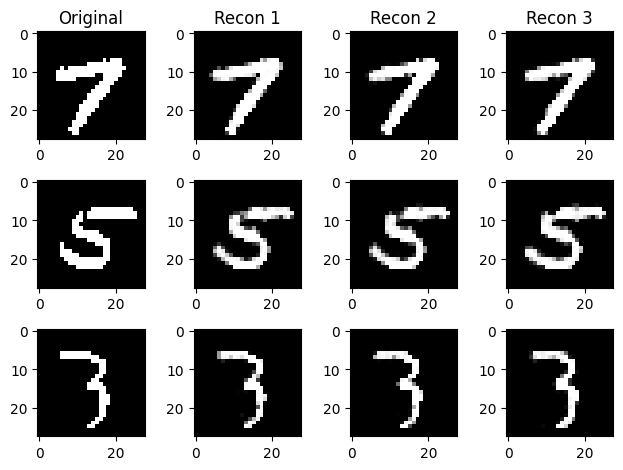

In [5]:
# Compare the initial image with its reconstructions

# Number of examples
examples = 3

# Number of steps through alternating Gibbs Markov chain
recon_steps = 1

# Create a figure and a grid of subplots for displaying images
figure, img = plt.subplots(examples, 4)

# Set titles for the subplots
img[0, 0].set_title('Original')
img[0, 1].set_title('Recon 1')
img[0, 2].set_title('Recon 2')
img[0, 3].set_title('Recon 3')

for i in range(examples):
    # Select a random digit to reconstruct
    digit = np.random.randint(0, X_train.shape[0] - 1)

    original_image = np.reshape(training_data[digit], (28, 28)) * 255

    # Display the original image in the first column
    img[i, 0].imshow(original_image, cmap='gray')

    rec1 = rbm.Reconstruct(training_data[digit], recon_steps)
    rec1_img = np.reshape(rec1, (28, 28)) * 255
    # Display the first reconstruction in the second column
    img[i, 1].imshow(rec1_img, cmap='gray')

    rec2 = rbm.Reconstruct(rec1, recon_steps)
    rec2_img = np.reshape(rec2, (28, 28)) * 255
    # Display the second reconstruction in the third column
    img[i, 2].imshow(rec2_img, cmap='gray')

    rec3 = rbm.Reconstruct(rec2, recon_steps)
    rec3_img = np.reshape(rec3, (28, 28)) * 255
    # Display the third reconstruction in the fourth column
    img[i, 3].imshow(rec3_img, cmap='gray')

# Adjust layout and display the figure
figure.tight_layout()
plt.show()


## References

1. ["Neural networks and physical systems with emergent collective computational abilities", JJ Hopfield.](https://www.pnas.org/doi/abs/10.1073/pnas.79.8.2554)

2. [“History of the Lenz-Ising model”, Stephen G Brush.](https://journals.aps.org/rmp/abstract/10.1103/RevModPhys.39.883)

3. ["A learning algorithm for Boltzmann machines",
DH Ackley, GE Hinton, TJ Sejnowski.](https://www.sciencedirect.com/science/article/abs/pii/S0364021385800124)

4. ["Information processing in dynamical systems: Foundations
of harmony theory", Paul Smolensky, Tech. rep. Colorado Univ at Boulder Dept of Computer Science, 1986](https://stanford.edu/~jlmcc/papers/PDP/Volume%201/Chap6_PDP86.pdf)

5. ["Training products of experts by minimizing contrastive divergence",
GE Hinton.](https://ieeexplore.ieee.org/abstract/document/6789337)

6. ["A practical guide to training restricted Boltzmann machines",
GE Hinton.](https://www.csrc.ac.cn/upload/file/20170703/1499052743888438.pdf)